### Cadenas de markov para predecir el lenguaje - Metegol

In [10]:
import re
import random
from collections import defaultdict
import networkx as nx
import matplotlib.pyplot as plt

class MarkovChainPredictor:
    def __init__(self):
        self.transition_matrix = defaultdict(lambda: defaultdict(int))
        self.terminal_states = set([".", "?"])

    def train(self, text):
        """
        Entrena el modelo de cadenas de Markov usando un texto dado.
        
        :param text: Cadena con el texto de entrenamiento.
        """
        words = re.findall(r'\w+|[.!?]', text)
        for i in range(len(words) - 1):
            current_word = words[i]
            next_word = words[i + 1]
            self.transition_matrix[current_word][next_word] += 1

    def print_transition_matrix_for_word(self, word):
        """
        Imprime la matriz de transición para una palabra específica.
        
        :param word: La palabra para la que se quiere imprimir la matriz de transición.
        """
        if word in self.transition_matrix:
            print(f"Transiciones para la palabra '{word}':")
            for next_word, count in self.transition_matrix[word].items():
                print(f"  {next_word}: {count}")
        else:
            print(f"La palabra '{word}' no tiene transiciones registradas.")

    def predict_next_word(self, current_word):
        """
        Predice la siguiente palabra basada en el modelo de cadenas de Markov.
        
        :param current_word: La palabra actual.
        :return: La siguiente palabra predicha o None si no hay una predicción.
        """
        next_words = self.transition_matrix[current_word]
        if not next_words:
            return None

        total_transitions = sum(next_words.values())
        words, probabilities = zip(*[(word, count / total_transitions) for word, count in next_words.items()])

        return random.choices(words, probabilities)[0]

    def generate_sentence(self, start_word):
        """
        Genera una oración a partir de una palabra inicial hasta llegar a un estado terminal.
        
        :param start_word: La palabra inicial de la oración.
        :return: Una oración generada como cadena.
        """
        current_word = start_word
        sentence = [current_word]

        while current_word not in self.terminal_states:
            next_word = self.predict_next_word(current_word)
            if not next_word:
                break
            sentence.append(next_word)
            current_word = next_word

        return " ".join(sentence)
    
    def visualize_transitions(self, word):
        """
        Crea una visualización de las transiciones de una palabra específica.
        
        :param word: La palabra para la que se quiere visualizar las transiciones.
        """
        if word not in self.transition_matrix:
            print(f"La palabra '{word}' no tiene transiciones registradas.")
            return

        G = nx.DiGraph()

        for next_word, count in self.transition_matrix[word].items():
            G.add_edge(word, next_word, weight=count)

        pos = nx.spring_layout(G)  # Posición de los nodos
        plt.figure(figsize=(10, 6))

        nx.draw_networkx_nodes(G, pos, node_size=700, node_color='lightblue')

        edges = G.edges(data=True)
        nx.draw_networkx_edges(
            G, pos, edgelist=edges,
            width=[data['weight'] for _, _, data in edges]
        )

        nx.draw_networkx_labels(G, pos, font_size=10, font_family="sans-serif")
        edge_labels = {(u, v): d['weight'] for u, v, d in edges}
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

        plt.title(f"Transiciones para la palabra '{word}'")
        plt.axis("off")
        plt.show()

In [11]:
with open("metegol_limpio.txt", "r", encoding="utf-8") as file:
    texto_entrenamiento = file.read()


In [12]:
markov_predictor = MarkovChainPredictor()
markov_predictor.train(texto_entrenamiento)

In [13]:
markov_predictor.print_transition_matrix_for_word("gol")

Transiciones para la palabra 'gol':
  .: 3
  ni: 1
  !: 5
  de: 1


In [14]:
oracion_generada = markov_predictor.generate_sentence("gol")

In [15]:
oracion_generada

'gol ! Vamos ! Por favor .'

In [16]:
markov_predictor.generate_sentence("gol")

'gol .'

In [17]:
markov_predictor.generate_sentence("gol")

'gol .'

In [18]:
markov_predictor.generate_sentence("Amadeo")

'Amadeo .'

In [19]:
markov_predictor.generate_sentence("Amadeo")

'Amadeo .'

In [20]:
for i in range(100):
    print(markov_predictor.generate_sentence("Che"))

Che Donald ! Vuelve .
Che Donald ! Cálmate Beto en serio te vas a la ventana ?
Che Donald ! Olé Olé .
Che Donald ! Rata ! ESSA Cheaty Bank Bank La pasa este equipo que usar tu lugar se le importa .
Che Donald ! Maldito pueblo ! Aquí ! Loco por eso .
Che Donald ! Acá ! Campeón ! No puedes hacernos esto ?
Che Donald ! Muchachos esto se le decíamos a ti te lo aclara .
Che Donald ! En serio te llamas .
Che Donald ! Te acuerdas ?
Che Donald ! Vamos muchachos con la sequía ?
Che Donald ! Para qué no se dice cuando se puede detener el pueblo ! Enciéndela ! Encara el triunfo la lengua los tengo la amistad ! Vamos .
Che Donald ! El silencio en el tema de mugrientos .
Che Donald ! Eso Tulio lo vas a la estirada del Grosso la boca .
Che Donald ! Por primera vez me hacen todos juntos .
Che Donald ! Ni idea .
Che Donald ! Lárgala ! Ya era imposible de demostrarme lo vamos .
Che Donald ! Acabo de la pelota .
Che Donald ! Bájense todos .
Che Donald ! Amadeo no .
Che Donald ! Qué hace poco tiempo en l

In [21]:
with open("metegol_limpio.txt", "r", encoding="utf-8") as file:
    texto_entrenamiento = file.read()

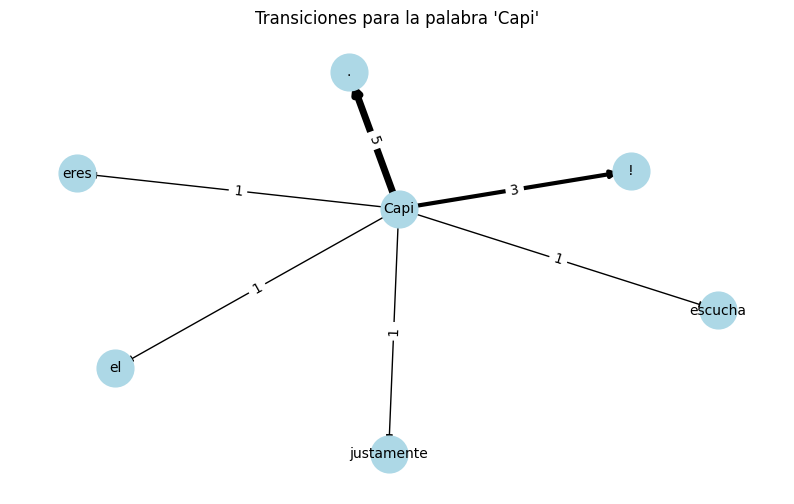

In [22]:
markov_predictor.visualize_transitions("Capi")

## n-gramas

In [23]:
import re
import random
from collections import defaultdict

class NgramModel:
    def __init__(self, n):
        self.n = n
        self.ngram_counts = defaultdict(lambda: defaultdict(int))
    
    def train(self, text):
        """
        Entrena el modelo de n-gramas usando un texto dado.
        
        :param text: Cadena con el texto de entrenamiento.
        """
        words = re.findall(r'\w+', text.lower())
        for i in range(len(words) - self.n + 1):
            ngram = tuple(words[i:i + self.n - 1])
            next_word = words[i + self.n - 1]
            self.ngram_counts[ngram][next_word] += 1

    def generate_text(self, start_words, max_length=50):
        """
        Genera una secuencia de palabras basada en el modelo de n-gramas.
        
        :param start_words: Lista de palabras iniciales (debe tener longitud n-1).
        :param max_length: Número máximo de palabras a generar.
        :return: Una cadena con la secuencia generada.
        """
        current_context = tuple(start_words)
        output = list(current_context)

        for _ in range(max_length):
            next_word = self.predict_next_word(current_context)
            if not next_word:
                break
            output.append(next_word)
            current_context = tuple(output[-(self.n - 1):])

        return " ".join(output)
    def predict_next_word(self, context):
        """
        Predice la siguiente palabra basándose en el contexto de n-1 palabras.
        
        :param context: Tupla de n-1 palabras.
        :return: La siguiente palabra elegida probabilísticamente o None si no hay datos.
        """
        next_word_candidates = self.ngram_counts.get(context, None)
        if not next_word_candidates:
            return None

        words, counts = zip(*next_word_candidates.items())
        probabilities = [count / sum(counts) for count in counts]
        return random.choices(words, probabilities)[0]


In [70]:
with open("metegol_limpio.txt", "r", encoding="utf-8") as file:
    texto_entrenamiento = file.read()

In [25]:
ngram_model = NgramModel(n=3)
ngram_model.train(texto_entrenamiento)

In [26]:
contexto = ("lo", "amadeo")
siguiente_palabra = ngram_model.predict_next_word(contexto)
print(f"Contexto: {contexto}")
print(f"Siguiente palabra: {siguiente_palabra}")


Contexto: ('lo', 'amadeo')
Siguiente palabra: None


In [27]:
oracion_generada = ngram_model.generate_text(["amadeo", "lo"], max_length=10)
print("Oración generada:", oracion_generada)

Oración generada: amadeo lo


### CODIGO DE N-GRAMAS CON CHAT

Para no borrar lo hago aca, por lo que entendí, tendriamos que entrenar al modelo con un n que nosotros decidamos, que ese va a ser cuanto contexto va a tener nuestro modelo. De ahí, le vamos a dar textos de n-1 y que prediga la siguiente palabra que debería seguir.

In [109]:
import re
import random
from collections import defaultdict, Counter

class NgramModel:
    def __init__(self, n):
        self.n = n
        self.ngram_counts = defaultdict(lambda: defaultdict(int))
        self.global_word_counts = defaultdict(int)  # Frecuencia global de palabras

    def train(self, text):
        """
        Entrena el modelo de n-gramas usando un texto dado.
        """
        text = text.lower()  # Ignorar mayúsculas y minúsculas
        words = re.findall(r'\w+', text)
        for i in range(len(words) - self.n + 1):
            ngram = tuple(words[i:i + self.n - 1])
            next_word = words[i + self.n - 1]
            self.ngram_counts[ngram][next_word] += 1

        # Contar frecuencias globales de palabras
        for word in words:
            self.global_word_counts[word] += 1
        print(f"Frecuencias globales: {dict(self.global_word_counts)}")

    def complete_sentence(self, partial_sentence):
        """
        Completa la frase dada (con una palabra faltante).
        """
        partial_sentence = partial_sentence.lower()  # Convertir a minúsculas
        words = re.findall(r'\w+', partial_sentence)

        if len(words) < self.n - 1:
            raise ValueError(f"La frase debe tener al menos {self.n - 1} palabras para completar.")

        # Tomar las últimas (n-1) palabras del contexto dado
        context = words[-(self.n - 1):]
        next_word = self.predict_next_word(context)
        
        # Devolver la frase completada
        return ' '.join(words) + ' ' + next_word

    def predict_next_word(self, context):
        """
        Predice la siguiente palabra basándose en el contexto de n-1 palabras.
        Si el contexto no existe, selecciona una palabra basada en coincidencias parciales o globales.
        """
        if len(context) != self.n - 1:
            raise ValueError(f"El contexto debe tener {self.n - 1} palabras.")

        context_tuple = tuple(context)
        next_word_candidates = self.ngram_counts.get(context_tuple, None)

        if next_word_candidates:
            # Caso 1: El contexto existe exactamente
            words, counts = zip(*next_word_candidates.items())
            probabilities = [count / sum(counts) for count in counts]
            print(f"Candidatos exactos: {words}, Probabilidades: {probabilities}")
            return random.choices(words, probabilities)[0]
        else:
            # Caso 2: Buscar coincidencias parciales
            partial_matches = self.find_partial_matches(context)
            if partial_matches:
                words, counts = zip(*partial_matches.items())
                probabilities = [count / sum(counts) for count in counts]
                print(f"Candidatos parciales: {words}, Probabilidades: {probabilities}")
                return random.choices(words, probabilities)[0]
            else:
                # Caso 3: Selección aleatoria global como último recurso
                print(f"El contexto {' '.join(context)} no tiene coincidencias exactas ni parciales.")
                words, counts = zip(*self.global_word_counts.items())
                probabilities = [count / sum(counts) for count in counts]
                return random.choices(words, probabilities)[0]

    def find_partial_matches(self, context):
        """
        Encuentra palabras que podrían ser candidatas basándose en coincidencias parciales del contexto.
        """
        matches = Counter()
        for ngram, next_words in self.ngram_counts.items():
            # Verifica cuántas palabras del contexto están presentes en el ngram
            if any(word in ngram for word in context):
                for word, count in next_words.items():
                    matches[word] += count
        return matches

# Ejemplo de uso
if __name__ == "__main__":
    with open("metegol_limpio.txt", "r", encoding="utf-8") as file:
        texto_entrenamiento = file.read()

    model = NgramModel(n=3)
    model.train(texto_entrenamiento)

    # Completar una frase con una palabra faltante
    partial_sentence = "vamos equipo"  # Contexto parcialmente válido
    completed_sentence = model.complete_sentence(partial_sentence)
    print(f"Frase completada: {completed_sentence}")


Frecuencias globales: {'papá': 4, 'qué': 105, 'pasa': 19, 'haces': 16, 'tú': 40, 'vamos': 53, 've': 8, 'a': 178, 'dormir': 2, 'no': 275, 'hay': 16, 'nada': 28, 'que': 143, 'hacer': 8, 'cree': 1, 'por': 71, 'eso': 20, 'los': 55, 'me': 79, 'parece': 9, 'ya': 14, 'es': 66, 'hora': 6, 'de': 130, 'contarle': 1, 'entonces': 4, 'si': 31, 'está': 19, 'todo': 21, 'el': 227, 'día': 2, 'enchufado': 1, 'en': 58, 'ese': 9, 'aparato': 1, 'ni': 14, 'escucha': 2, 'soy': 20, 'un': 88, 'fracaso': 3, 'como': 20, 'padre': 5, 'amarguísimo': 1, 'hablar': 4, 'con': 47, 'él': 10, 'tranquilo': 5, 'eh': 2, 'mati': 1, 'puedo': 8, 'contigo': 2, 'estoy': 18, 'dormido': 1, 'mañana': 3, 'dejaste': 2, 'juego': 6, 'encendido': 1, 'mira': 17, 'jugada': 2, 'difícil': 2, 'cómo': 39, 'hiciste': 4, 'muéstrame': 1, 'dime': 1, 'estabas': 1, 'durmiendo': 1, 'tenemos': 8, 'ponte': 1, 'cómodo': 1, 'te': 86, 'voy': 19, 'contar': 1, 'una': 38, 'historia': 4, 'pero': 39, 'tienes': 12, 'usar': 1, 'tu': 8, 'imaginación': 1, 'esto': 